In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import os
import shutil

working_dir = "/kaggle/working"

for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)

    if os.path.isfile(item_path):
        os.remove(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("All contents within /kaggle/working have been deleted.")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/8000-images-dataset/README.dataset.txt
/kaggle/input/8000-images-dataset/README.roboflow.txt
/kaggle/input/8000-images-dataset/data.yaml
/kaggle/input/8000-images-dataset/valid/labels/302e07eb7155dc39_jpg.rf.3ade9b6d15fad6cf248ac940123b5681.txt
/kaggle/input/8000-images-dataset/valid/labels/3f733474f5833879_jpg.rf.07c0139b4940aeadf3a0480dff74626e.txt
/kaggle/input/8000-images-dataset/valid/labels/d5ec6c4bded4c388_jpg.rf.8893b6718d4b464d2010c126577f4015.txt
/kaggle/input/8000-images-dataset/valid/labels/7df8dbc0eb50f51c_jpg.rf.68d55cd7ee71f16071f1e0f14576b9b1.txt
/kaggle/input/8000-images-dataset/valid/labels/9d015956ddf611c4_jpg.rf.96ccab6c34356e58a2ce77a99931f684.txt
/kaggle/input/8000-images-dataset/valid/labels/ae4ea32f2aaf935b_jpg.rf.04d7fca0448f530852b05aa5e2664854.txt
/kaggle/input/8000-images-dataset/valid/labels/ec04ff0dc10423a8_jpg.rf.74991b6912f34b733423d4a3c800ce81.txt
/kaggle/input/8000-images-dataset/valid/labels/86fd699a3fa84312_jpg.rf.088904d5a5e9f1d17dc271

In [2]:
!pip install pycocotools fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.0/943.0 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:0

In [3]:
import yaml

with open("/kaggle/input/8000-images-dataset/data.yaml") as f:
    data_config = yaml.safe_load(f)
    class_names = data_config['names']  # Get real class names

# Temporary workaround if you actually have 1 class
if len(class_names) == 1:
    class_names.append('background')

In [4]:
!pip install rfdetr supervision albumentations opencv-python torch torchvision --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [5]:
!pip install tqdm
!pip install -U albumentations
!pip install rfdetr torchvision pytorch-lightning
!pip install rfdetr[onnxexport]
!pip install rfdetr supervision albumentations opencv-python torch torchvision --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.4
    Uninstalling albumentations-2.0.4:
      Successfully uninstalled albumentations-2.0.4


In [6]:
import os
import json
import shutil
import yaml
import cv2
import numpy as np
from PIL import Image
from rfdetr import RFDETRBase
from tqdm import tqdm
import torch
import albumentations as A

# =====================
# Configuration
# =====================
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
yolo_dir = "/kaggle/input/8000-images-dataset"
output_dir = "/kaggle/working/coco_dataset"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# =====================
# Preprocessing Functions
# =====================
def adjust_brightness_contrast(image, alpha=1.2, beta=15, **kwargs):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def simple_white_balance(image, **kwargs):
    result = image.astype(np.float32)
    avg_b, avg_g, avg_r = np.mean(result, axis=(0,1))
    avg_gray = (avg_b + avg_g + avg_r) / 3
    result[..., 0] *= avg_gray / avg_b
    result[..., 1] *= avg_gray / avg_g
    result[..., 2] *= avg_gray / avg_r
    return np.clip(result, 0, 255).astype(np.uint8)

def histogram_equalization(image, **kwargs):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[..., 0] = cv2.equalizeHist(img_yuv[..., 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# =====================
# Augmentation Pipeline
# =====================
preprocess = A.Compose([
    A.Lambda(image=lambda image, **kw: adjust_brightness_contrast(image)),
    A.Lambda(image=lambda image, **kw: simple_white_balance(image)),
    A.Lambda(image=lambda image, **kw: histogram_equalization(image)),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
])

# =====================
# Dataset Conversion
# =====================
def process_image(image_path):
    """Apply preprocessing pipeline"""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    processed = preprocess(image=image)['image']
    return processed

def yolo_to_coco(yolo_root, output_root):
    # Load class names
    with open(os.path.join(yolo_root, "data.yaml")) as f:
        class_names = yaml.safe_load(f)['names']
    
    if len(class_names) == 1:
        class_names.append("background")

    # Create category mapping
    categories = [{"id": i, "name": n, "supercategory": "object"} for i, n in enumerate(class_names)]

    for split in ['train','valid','test']:
        split_dir = os.path.join(output_root, split)
        os.makedirs(split_dir, exist_ok=True)

        coco_data = {
            "info": {"description": "Preprocessed Dataset"},
            "licenses": [{"name": "MIT"}],
            "categories": categories,
            "images": [],
            "annotations": []
        }

        annotation_id = 1
        image_id = 1

        # Process images with preprocessing
        img_dir = os.path.join(yolo_root, split, "images")
        lbl_dir = os.path.join(yolo_root, split, "labels")

        for img_file in tqdm(os.listdir(img_dir)):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            # Process and save image
            src_path = os.path.join(img_dir, img_file)
            dst_path = os.path.join(split_dir, img_file)
            
            # Apply preprocessing chain
            processed_img = process_image(src_path)
            cv2.imwrite(dst_path, cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR))

            # Get dimensions
            height, width = processed_img.shape[:2]

            # Add image entry
            coco_data["images"].append({
                "id": image_id,
                "file_name": img_file,
                "width": width,
                "height": height,
                "license": 1,
                "date_captured": "2024-01-01"
            })

            # Process labels
            label_path = os.path.join(lbl_dir, os.path.splitext(img_file)[0] + ".txt")
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) != 5: continue

                        cls_id, xc, yc, w, h = map(float, parts)
                        x_min = (xc - w/2) * width
                        y_min = (yc - h/2) * height
                        box_w = w * width
                        box_h = h * height

                        coco_data["annotations"].append({
                            "id": annotation_id,
                            "image_id": image_id,
                            "category_id": int(cls_id),
                            "bbox": [x_min, y_min, box_w, box_h],
                            "area": box_w * box_h,
                            "iscrowd": 0
                        })
                        annotation_id += 1

            image_id += 1

        # Save annotations
        with open(os.path.join(split_dir, "_annotations.coco.json"), 'w') as f:
            json.dump(coco_data, f, indent=2)

# =====================
# Training Setup
# =====================
if __name__ == "__main__":
    # Convert dataset
    import os
    import shutil
    
    working_dir = "/kaggle/working"
    
    for item in os.listdir(working_dir):
        item_path = os.path.join(working_dir, item)
    
        if os.path.isfile(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
    
    print("All contents within /kaggle/working have been deleted.")
    yolo_to_coco(yolo_dir, output_dir)

2025-04-28 09:38:03.972430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745833084.192806      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745833084.258123      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


All contents within /kaggle/working have been deleted.


100%|██████████| 348/348 [00:09<00:00, 36.26it/s]


rf-detr-base.pth: 100%|██████████| 355M/355M [00:09<00:00, 39.9MiB/s]


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

Loading pretrain weights
Backbone parameter freezing status:
  0.encoder.encoder.embeddings.cls_token: requires_grad = False
  0.encoder.encoder.embeddings.mask_token: requires_grad = False
  0.encoder.encoder.embeddings.position_embeddings: requires_grad = False
  0.encoder.encoder.embeddings.patch_embeddings.projection.weight: requires_grad = False
  0.encoder.encoder.embeddings.patch_embeddings.projection.bias: requires_grad = False
  0.encoder.encoder.encoder.layer.0.norm1.weight: requires_grad = False
  0.encoder.encoder.encoder.layer.0.norm1.bias: requires_grad = False
  0.encoder.encoder.encoder.layer.0.attention.attention.query.weight: requires_grad = False
  0.encoder.encoder.encoder.layer.0.attention.attention.query.bias: requires_grad = False
  0.encoder.encoder.encoder.layer.0.attention.attention.key.weight: requires_grad = False
  0.encoder.encoder.encoder.layer.0.attention.attention.key.bias: requires_grad = False
  0.encoder.encoder.encoder.layer.0.attention.attention.va

fatal: not a git repository (or any of the parent directories): .git


Epoch: [0]  [  0/536]  eta: 0:45:12  lr: 0.000100  class_error: 100.00  loss: 8.8727 (8.8727)  loss_ce: 0.9781 (0.9781)  loss_bbox: 0.3750 (0.3750)  loss_giou: 0.7846 (0.7846)  loss_ce_0: 0.9411 (0.9411)  loss_bbox_0: 0.4260 (0.4260)  loss_giou_0: 0.8286 (0.8286)  loss_ce_1: 0.9697 (0.9697)  loss_bbox_1: 0.3738 (0.3738)  loss_giou_1: 0.7921 (0.7921)  loss_ce_enc: 1.0429 (1.0429)  loss_bbox_enc: 0.5135 (0.5135)  loss_giou_enc: 0.8473 (0.8473)  loss_ce_unscaled: 0.9781 (0.9781)  class_error_unscaled: 100.0000 (100.0000)  loss_bbox_unscaled: 0.0750 (0.0750)  loss_giou_unscaled: 0.3923 (0.3923)  cardinality_error_unscaled: 3896.0000 (3896.0000)  loss_ce_0_unscaled: 0.9411 (0.9411)  loss_bbox_0_unscaled: 0.0852 (0.0852)  loss_giou_0_unscaled: 0.4143 (0.4143)  cardinality_error_0_unscaled: 3898.0000 (3898.0000)  loss_ce_1_unscaled: 0.9697 (0.9697)  loss_bbox_1_unscaled: 0.0748 (0.0748)  loss_giou_1_unscaled: 0.3960 (0.3960)  cardinality_error_1_unscaled: 3894.0000 (3894.0000)  loss_ce_enc_un

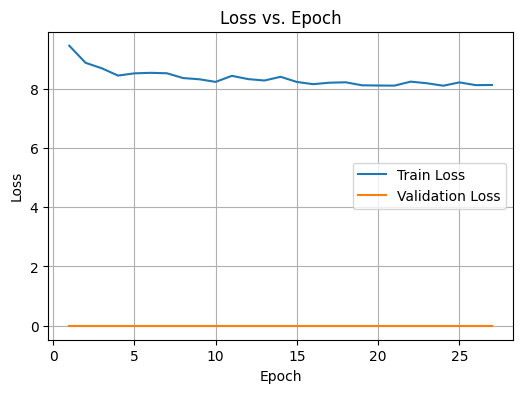

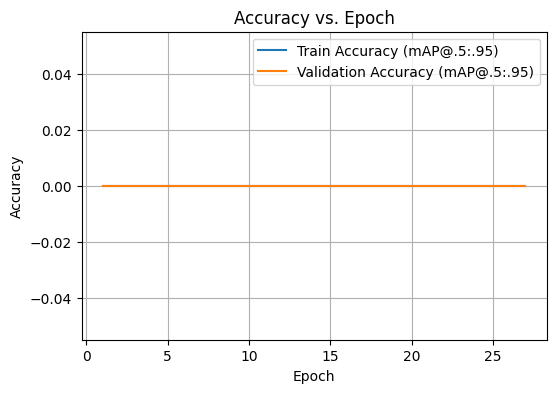

In [7]:
import torch
import json
import os
import csv
import matplotlib.pyplot as plt
from rfdetr import RFDETRBase  # correct import from the RF-DETR package

# Define output directory
output_path = "/kaggle/working/output"
os.makedirs(output_path, exist_ok=True)

# Initialize model
model = RFDETRBase(
    resolution=336,
    num_classes=len(class_names),
)

# === Introspect RFDETRBase attributes ===
# Step 1: Freeze the entire model first
# 1. Freeze all parameters
for param in model.model.model.parameters():
    param.requires_grad = False

# 2. Unfreeze detection head
for param in model.model.model.class_embed.parameters():
    param.requires_grad = True
for param in model.model.model.bbox_embed.parameters():
    param.requires_grad = True

# 3. Unfreeze the last 2 decoder layers of the transformer
for layer in model.model.model.transformer.decoder.layers[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

# 4. VERIFY: print requires_grad for backbone params
print("Backbone parameter freezing status:")
for name, param in model.model.model.backbone.named_parameters():
    print(f"  {name}: requires_grad = {param.requires_grad}")

# (Optional) List out all trainable params
print("\nTrainable parameters:")
for name, param in model.model.model.named_parameters():
    if param.requires_grad:
        print(f"  {name}")



# Track best model
best_val_acc = 0.0
best_ckpt_path = os.path.join(output_path, "best.pt")

# Metrics history
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "train_acc": [],
    "val_acc": []
}

def on_epoch_end(metrics: dict):
    global best_val_acc

    epoch = len(history["epoch"]) + 1
    train_loss = metrics.get("train_loss", 0.0)
    val_loss = metrics.get("val_loss", 0.0)
    train_acc = metrics.get("train_map50_95", 0.0)
    val_acc = metrics.get("val_map50_95", 0.0)

    # Append to history
    history["epoch"].append(epoch)
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    # Save best checkpoint
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        if os.path.exists(best_ckpt_path):
            os.remove(best_ckpt_path)
        torch.save(model.state_dict(), best_ckpt_path)
        print(f"[Epoch {epoch}] New best model saved to best.pt (val_acc={val_acc:.4f})")

# Register callback
model.callbacks["on_fit_epoch_end"].append(on_epoch_end)

# Prepare trainer (unwrap DataParallel if used)
trainer = model.module if isinstance(model, torch.nn.DataParallel) else model

# Train
trainer.train(
    dataset_dir=output_dir,
    epochs=100,
    batch_size=4,
    grad_accum_steps=4,
    lr=1e-4,
    output_dir=output_path,
    early_stopping=True,
    early_stopping_patience=5,  # updated from 15 to 5
    tensorboard=True,
    wandb=False,
    optimizer_params={"weight_decay": 1e-4},
    use_amp=True
)

print("Training completed successfully!")

# Save metrics to JSON and CSV
with open(os.path.join(output_path, "history.json"), "w") as f:
    json.dump(history, f)

with open(os.path.join(output_path, "history.csv"), "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["epoch", "train_loss", "val_loss", "train_acc", "val_acc"])
    for i in range(len(history["epoch"])):
        writer.writerow([
            history["epoch"][i],
            history["train_loss"][i],
            history["val_loss"][i],
            history["train_acc"][i],
            history["val_acc"][i]
        ])

# Plotting
epochs = history["epoch"]

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_path, "loss_vs_epoch.png"))
plt.show()

# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(epochs, history["train_acc"], label="Train Accuracy (mAP@.5:.95)")
plt.plot(epochs, history["val_acc"], label="Validation Accuracy (mAP@.5:.95)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_path, "accuracy_vs_epoch.png"))
plt.show()